In [16]:
# Setting historical serie

from xcodex.main import download_file

start_date = "1st of February, 2022"
end_date = "28th of February, 2022"

download_file(start_date, end_date) # Downloading .nc4 files

File oco2_GEOS_L3CO2_day_20220201_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220202_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220203_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220204_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220205_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220206_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220207_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220208_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220209_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220210_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220211_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220214_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220212_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220213_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220215_B10206Ar.nc4 already exists.
File oco2_GEOS_L3CO2_day_20220217_B10206Ar.nc4 already 

In [17]:
from glob import glob
from os.path import join
from os import getcwd

arquive_folder = glob(join(getcwd(), "downloaded_data", "*.nc4")) # Selecting the folder with .nc4 files

# Setting desired locations

locations = dict(Mauna_loa=[19.479488, -155.602829],
                 New_York=[40.712776, -74.005974],
                 Paris=[48.856613, 2.352222])

In [18]:
from xcodex.main import xco2_extract

df = xco2_extract(path=arquive_folder,
                  start=start_date,
                  end=end_date,
                  missing_data=False,
                  **locations) # Extracting XCO2

df

,city,jd,day,month,year,lat,lon,lat_index,lon_index,xco2,xco2_prec
0,Mauna_loa,32.0,1.0,2.0,2022.0,19.479488,-155.602829,219.0,39.0,417.965286,1.000000e-07
1,Mauna_loa,33.0,2.0,2.0,2022.0,19.479488,-155.602829,219.0,39.0,418.602638,1.000000e-07
2,Mauna_loa,34.0,3.0,2.0,2022.0,19.479488,-155.602829,219.0,39.0,417.983378,1.000000e-07
3,Mauna_loa,35.0,4.0,2.0,2022.0,19.479488,-155.602829,219.0,39.0,417.514515,1.000000e-07
4,Mauna_loa,36.0,5.0,2.0,2022.0,19.479488,-155.602829,219.0,39.0,417.151768,1.000000e-07
...,...,...,...,...,...,...,...,...,...,...,...
79,Paris,55.0,24.0,2.0,2022.0,48.856613,2.352222,278.0,292.0,419.482440,1.782026e-07
80,Paris,56.0,25.0,2.0,2022.0,48.856613,2.352222,278.0,292.0,420.058346,1.782026e-07
81,Paris,57.0,26.0,2.0,2022.0,48.856613,2.352222,278.0,292.0,419.891832,1.782026e-07
82,Paris,58.0,27.0,2.0,2022.0,48.856613,2.352222,278.0,292.0,419.811891,1.782026e-07


# Data visualization

In [19]:
## set mapbox access token
import plotly.express as px
import plotly.graph_objs as go

px.set_mapbox_access_token('pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA')

# Plotly configs

fig= px.scatter_mapbox(df,
                              lat= 'lat',
                              lon= 'lon',
                              color= 'xco2',
                              zoom= .85,
                              width=960,
                              height=540,
                              size_max=10,
                              hover_name='city',
                              color_continuous_scale=px.colors.cyclical.IceFire)

fig.update_layout(mapbox_style="dark") #"open-street-map"


layout = go.Layout(margin=go.layout.Margin(
    l=0,
    r=0,
    b=0,
    t=0))


fig.update_layout(layout,
                  autosize=False,
                  height=540,
                  width=960,
                  hovermode="closest")

# Saving the output image

#fig.write_html('xcodex_map.html')
#fig.write_image("xcodex_map.png", scale=2)

fig.show()

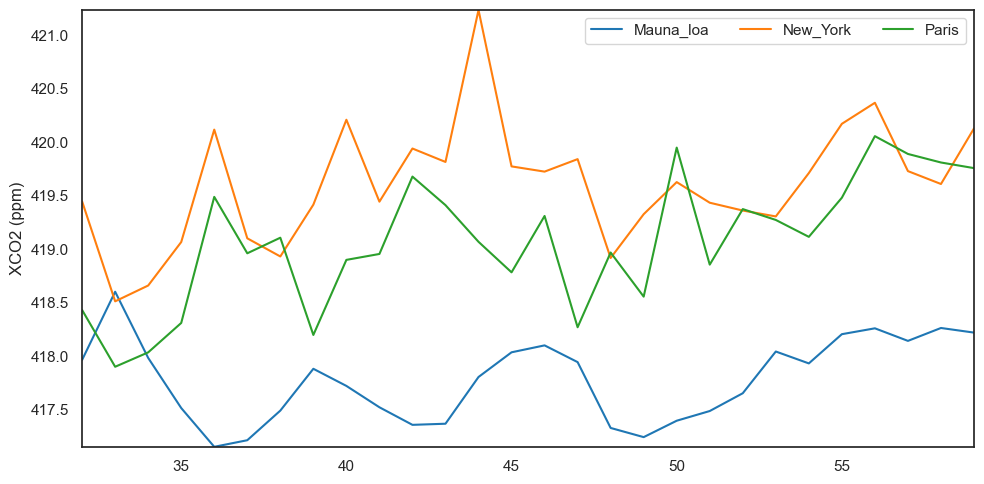

In [20]:
# Showing XCO2 behavior in time serie

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.set_theme(font_scale=1, style="white")

sns.lineplot(data=df,
             x="jd",
             y='xco2',
             hue='city',
             errorbar=('ci',0),
             palette="tab10")

plt.xlabel("")
plt.ylabel("XCO2 (ppm)")

plt.xlim(min(df.jd), max(df.jd))
plt.ylim(min(df.xco2), max(df.xco2))

sns.despine(right=False,
            top=False)

plt.legend(ncol=3)

plt.tight_layout()

#plt.savefig("xcodex_locations.png", dpi=300)

plt.show()